In [ ]:
import torchvision
from torchvision import datasets, transforms
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as F

In [23]:
transformation = transforms.Compose([
                        transforms.ToTensor(),#将读取数据转化为tensor,
                                              #转化到0-1之间
                                              #会将channel放在第一维度
])

In [24]:
train_ds = datasets.FashionMNIST(r'C:\Users\hang\Desktop\pytorch\data1', 
                            train= True, 
                            transform= transformation, 
                            download= True)

In [25]:
test_ds = datasets.FashionMNIST(r'C:\Users\hang\Desktop\pytorch\data1', 
                            train= False, 
                            transform= transformation, 
                            download= True)

In [26]:
train_dl = torch.utils.data.DataLoader(train_ds, batch_size = 64, shuffle = True)#将输入数据包装成一个traindataset
test_dl = torch.utils.data.DataLoader(test_ds, batch_size = 256)

In [27]:
imgs, labels = next(iter(train_dl))

In [28]:
imgs.shape

torch.Size([64, 1, 28, 28])

In [29]:
# 在pytorch中图片的表示形式：[batch, channel, hight, width]
                         #   批次   通道数   高度    宽度

In [30]:
img = imgs[0]
img.shape

torch.Size([1, 28, 28])

In [31]:
img = img.numpy()
img = np.squeeze(img)
img.shape

(28, 28)

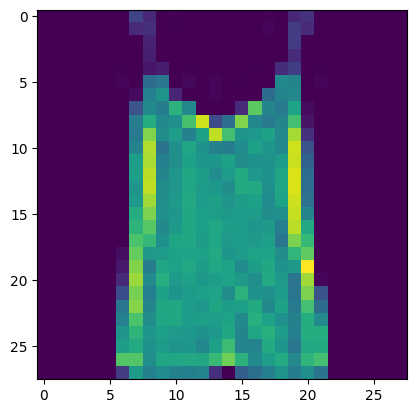

In [32]:
plt.imshow(img)

In [12]:
labels[ : 10]

tensor([4, 6, 2, 9, 8, 7, 3, 4, 3, 6])

In [13]:
def imshow(img):
    npimg = img.numpy()
    npimg = np.squeeze(npimg)
    plt.imshow(npimg)

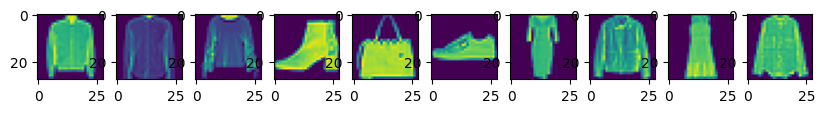

In [14]:
plt.figure(figsize=(10 ,1))
for i, img in enumerate(imgs[: 10]):
    plt.subplot(1, 10, i + 1)
    imshow(img)

In [15]:
#手写数字只有10个所以是10分类
#创建模型
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.liner_1 = nn.Linear(28 * 28, 120)
        self.liner_2 = nn.Linear(120, 84)
        self.liner_3 = nn.Linear(84, 10)
    def forward(self, input):
        #展平
        x = input.view(-1, 28 * 28)
        x = F.relu(self.liner_1(x))
        x = F.relu(self.liner_2(x))
        x = self.liner_3(x)
        return x

In [16]:
model = Model()
model 

Model(
  (liner_1): Linear(in_features=784, out_features=120, bias=True)
  (liner_2): Linear(in_features=120, out_features=84, bias=True)
  (liner_3): Linear(in_features=84, out_features=10, bias=True)
)

In [17]:
#创建损失函数
loss_fn = torch.nn.CrossEntropyLoss()

In [18]:
def fit(epoch, model, trainloader, testloader):
    #记录正确预测了多少个样本
    correct = 0
    #总共多少个样本
    total = 0
    running_loss = 0
    for x, y in trainloader:
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optim.zero_grad()
        loss.backward()
        optim.step()
        with torch.no_grad():
            y_pred = torch.argmax(y_pred, dim= 1)
            correct += (y_pred == y).sum().item() #算对了多少个样本
            total += y.size(0) #实际样本个数y.sise(0)代表运行样本的个数
            running_loss += loss.item() 
    epoch_loss = running_loss / len(trainloader.dataset) #每个样本的平均loss
    epoch_acc = correct / total #正确率


    test_correct = 0
    test_total = 0
    test_running_loss = 0
    with torch.no_grad():
        for x, y in testloader:
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = torch.argmax(y_pred, dim= 1) #y_pred真实预测结果
            test_correct += (y_pred == y).sum().item() #算对了多少个样本
            test_total += y.size(0) #实际样本个数y.sise(0)代表运行样本的个数
            test_running_loss += loss.item()
    epoch_test_loss = test_running_loss / len(testloader.dataset)
    epoch_test_acc = test_correct / test_total
    print('epoch:', epoch, 
          'loss:', round(epoch_loss, 3),
          'accuray:', round(epoch_acc, 3),
          'test_loss:', round(epoch_test_loss, 3),
          'test_accuracy:', round(epoch_test_acc, 3))

    return epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc

In [19]:
optim = torch.optim.Adam(model.parameters(), lr = 0.0001)
epochs = 20

In [20]:
train_loss = []
train_acc = []
test_loss = []
test_acc = [] 
for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc =  fit(epoch, model, train_dl, test_dl)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    test_loss.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)

epoch: 0 loss: 0.015 accuray: 0.694 test_loss: 0.002 test_accuracy: 0.781


KeyboardInterrupt: 